## What is Feature Selection?
- Feature selection is the process of choosing the most important features (variables) from a dataset to improve a machine learning model's performance and efficiency. Instead of using all the features, we select only the most relevant ones that contribute significantly to predictions.

## Why Do We Need Feature Selection?
1. Reduces Overfitting
    - Too many irrelevant features can make a model complex and cause it to overfit the training data.
2. Improves Model Performance
    - Selecting relevant features boosts accuracy and reduces unnecessary noise in the data.
3. Reduces Training Time
    - Fewer features mean faster model training and lower computational cost.
4. Enhances Interpretability
    - Helps in understanding which features actually impact predictions.

## Types of Feature Selection Methods
#### Filter Methods:
    - Correlation
    - Chi-Square
    - Mutual Information.
- Rank features based on statistical tests.

#### Wrapper Methods:
    - Forward/Backward Selection
    - Recursive Feature Elimination (RFE)
- Train models with different feature subsets and select the best.

#### Embedded Methods
    - Lasso Regression
    - Decision Trees
- Feature selection is built into the model training process.

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
# Step 1 : Create a Sample Dataset
np.random.seed(42)
data = pd.DataFrame({
    'Size' : np.random.randint(1000, 5000, 100), # Square feet
    'Bedrooms' : np.random.randint(1, 5, 100), # Number of bedrooms
    'Age' : np.random.randint(1, 50, 100), # Age of the house
    'Price' : np.random.randint(1000000, 5000000, 100) # House Price
})

## Compute Correlation (Filter Method)

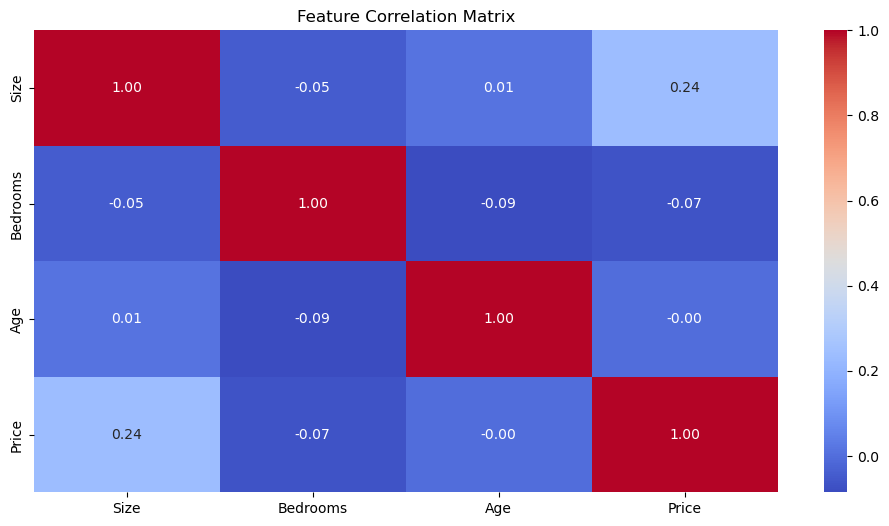

In [43]:
# Step 2 : Compute Correlation (Filter Method)
# Compute correlation to see how features relate to the target
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

## Recursive Feature Elimination (Wrapper Method)

In [45]:
# Step 3 : Apply Recursive Feature Elimination (Wrapper Method)
# Apply RFE (Wrapper Method) to select the top 2 important features
X = data.drop(columns=['Price']) # Features
y = data['Price'] # Target Variable

model = RandomForestRegressor()
rfe = RFE(model, n_features_to_select=2) # Select top 2 features
X_selected = rfe.fit_transform(X, y)

print("Selected Features using RFE : ", X.columns[rfe.support_])

Selected Features using RFE :  Index(['Size', 'Age'], dtype='object')


## Lasso (Least Absolute Shrinkage and Selection Operator) Regression (Embedded Method)

In [47]:
# Step 4 : Apply Lasso (Least Absolute Shrinkage and Selection Operator) Regression (Embedded Method)
# Apply Lasso Regression (Embedded Method) to eliminate irrelevant features
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
importance = np.abs(lasso.coef_)

# Display Feature Importance
selected_features = X.columns[importance > 0]
print("Selected Features using Lasso : ", selected_features)

Selected Features using Lasso :  Index(['Size', 'Bedrooms', 'Age'], dtype='object')
